In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [12]:
d=pd.read_csv('GlobalLandTemperaturesByCity.csv')

In [13]:
d

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


In [14]:
d.isna().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [15]:
mean = d['AverageTemperatureUncertainty'].mean()
d['AverageTemperatureUncertainty'] = d['AverageTemperatureUncertainty'].replace(np.NaN, mean)
mean


1.0285747414536994

In [16]:
mean = d['AverageTemperature'].mean()
d['AverageTemperature'] = d['AverageTemperature'].replace(np.NaN, mean)
mean


16.72743263625063

In [19]:
d['dt']=pd.to_datetime(d['dt'])
d.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
dtype: object

In [20]:
d['Year']=d['dt'].dt.year
anual_avg_temp=d.groupby('Year')['AverageTemperature'].mean().reset_index()
d.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
Year                                      int32
dtype: object

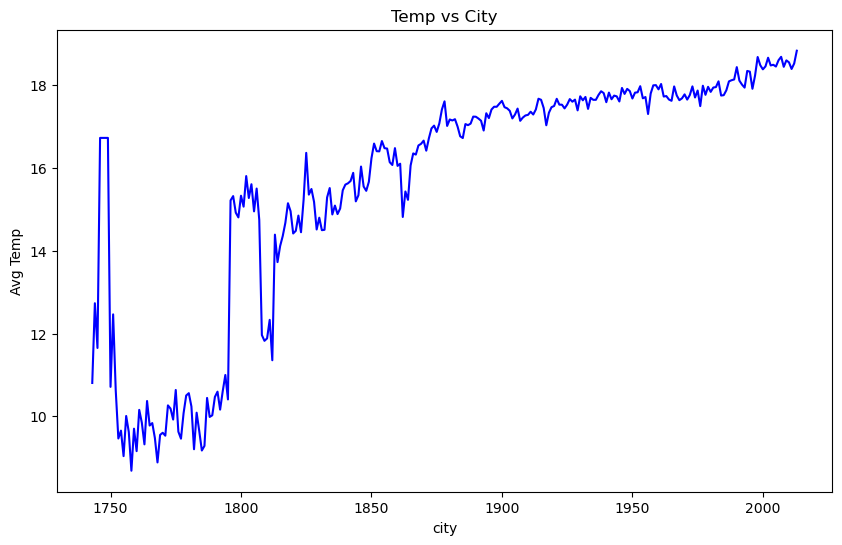

In [26]:
plt.figure(figsize=(10,6))
plt.plot(anual_avg_temp['Year'],anual_avg_temp['AverageTemperature'],color='b',linestyle='-')

plt.title('Temp vs City')
plt.xlabel('city')
plt.ylabel('Avg Temp')

plt.show()

In [24]:
d

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year
0,1743-11-01,6.068000,1.737000,Århus,Denmark,57.05N,10.33E,1743
1,1743-12-01,16.727433,1.028575,Århus,Denmark,57.05N,10.33E,1743
2,1744-01-01,16.727433,1.028575,Århus,Denmark,57.05N,10.33E,1744
3,1744-02-01,16.727433,1.028575,Århus,Denmark,57.05N,10.33E,1744
4,1744-03-01,16.727433,1.028575,Århus,Denmark,57.05N,10.33E,1744
...,...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464000,0.236000,Zwolle,Netherlands,52.24N,5.26E,2013
8599208,2013-06-01,15.043000,0.261000,Zwolle,Netherlands,52.24N,5.26E,2013
8599209,2013-07-01,18.775000,0.193000,Zwolle,Netherlands,52.24N,5.26E,2013
8599210,2013-08-01,18.025000,0.298000,Zwolle,Netherlands,52.24N,5.26E,2013


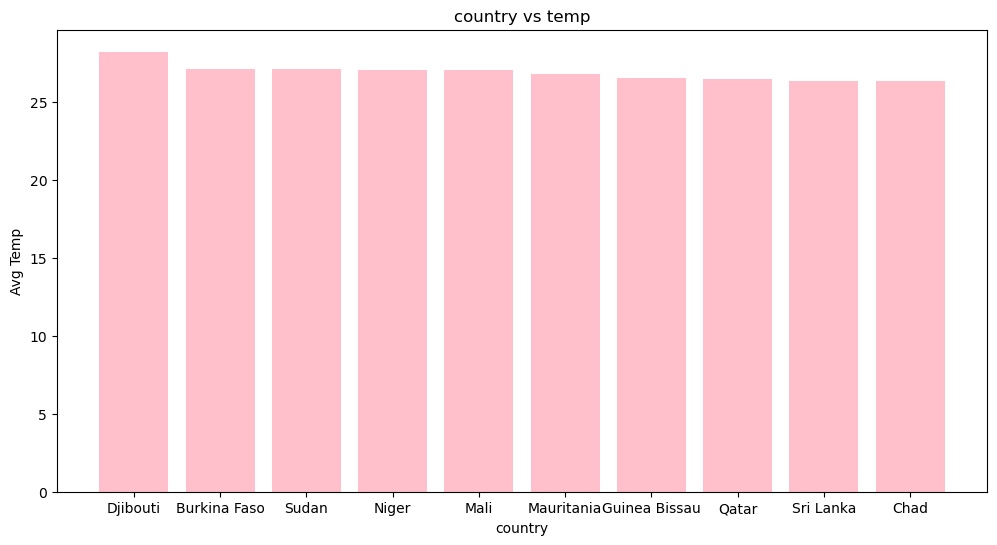

In [47]:
anual_avg_temp_country=d.groupby('Country')['AverageTemperature'].mean().reset_index()
anual_avg_temp_country=anual_avg_temp_country.sort_values(by='AverageTemperature',ascending=False).head(10)
plt.figure(figsize=(12,6))
plt.bar(anual_avg_temp_country['Country'],anual_avg_temp_country['AverageTemperature'],color='pink')

plt.title('country vs temp')
plt.xlabel('country')
plt.ylabel('Avg Temp')

plt.show()

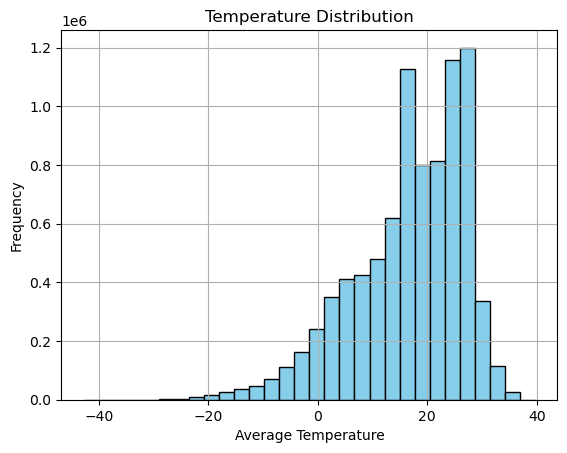

In [54]:
plt.hist(d['AverageTemperature'], bins=30, color='skyblue', edgecolor='black')

plt.title('Temperature Distribution')
plt.xlabel('Average Temperature')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

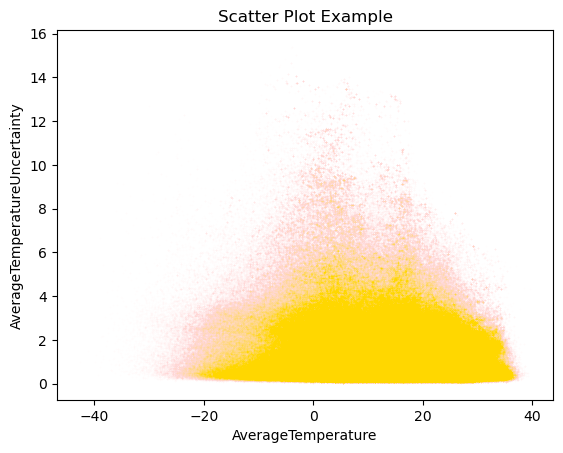

In [94]:
plt.scatter(d['AverageTemperature'], d['AverageTemperatureUncertainty'], c='gold',s=0.6,alpha=0.002)
plt.title('Scatter Plot Example')
plt.xlabel('AverageTemperature')
plt.ylabel('AverageTemperatureUncertainty')
plt.show()

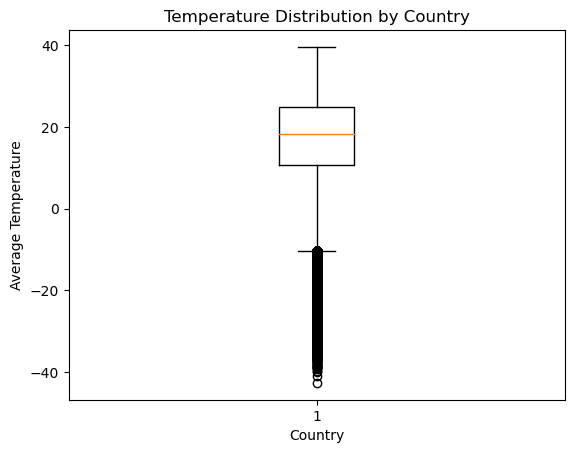

In [93]:
plt.boxplot('AverageTemperature', data=d)

plt.title('Temperature Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Average Temperature')
plt.show()


In [96]:
#load tips dataset from seaborn
tips=sns.load_dataset('tips')

In [98]:
#print 5 tips data
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


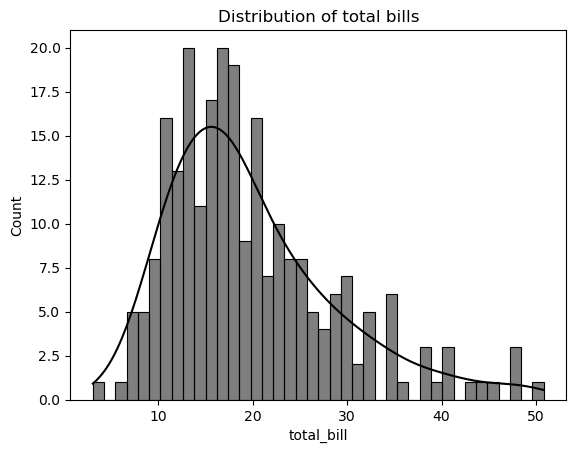

In [109]:
sns.histplot(data=tips,x='total_bill',color='black',bins=40,kde=True)
plt.title('Distribution of total bills')
plt.show()

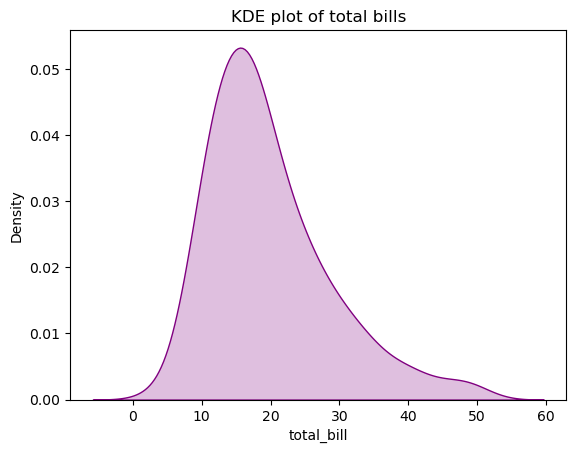

In [115]:
#KDE plot

sns.kdeplot(data=tips,x='total_bill',fill=True,color='purple')
plt.title('KDE plot of total bills')
plt.show()

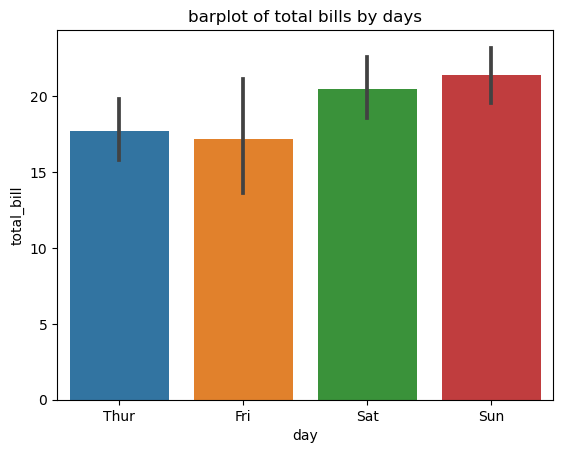

In [117]:
sns.barplot(data=tips,x='day',y='total_bill')
plt.title('barplot of total bills by days')
plt.show()

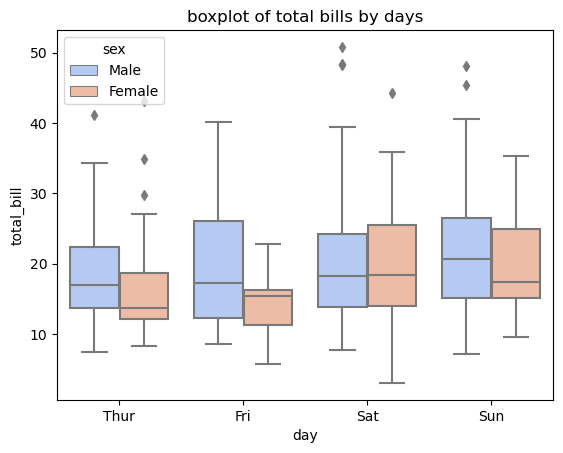

In [119]:
sns.boxplot(data=tips,x='day',y='total_bill',hue='sex',palette='coolwarm')
plt.title('boxplot of total bills by days')
plt.show()

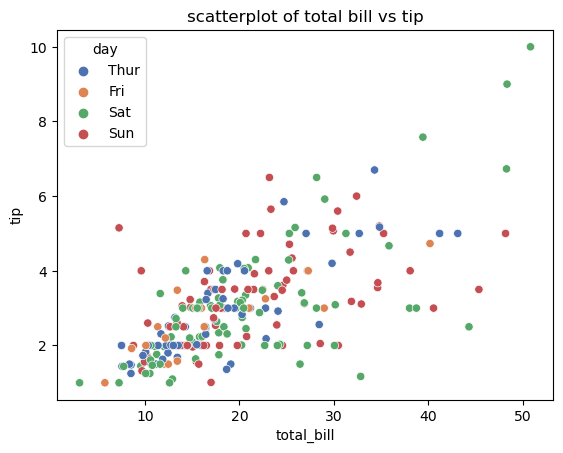

In [121]:
sns.scatterplot(data=tips,x='total_bill',y='tip',hue='day',palette='deep')
plt.title('scatterplot of total bill vs tip')
plt.show()

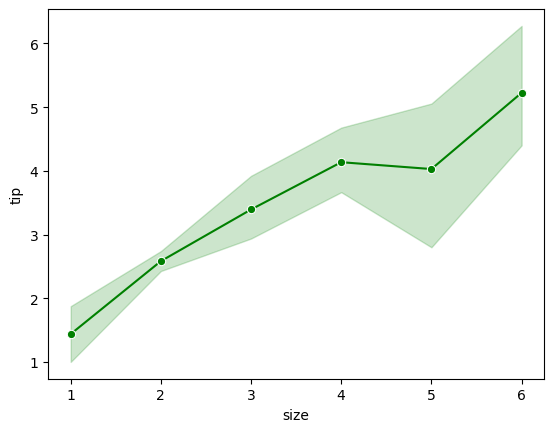

In [122]:
sns.lineplot(data=tips,x='size',y='tip',marker='o',color='green')
plt.show()

C:\Users\CVR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


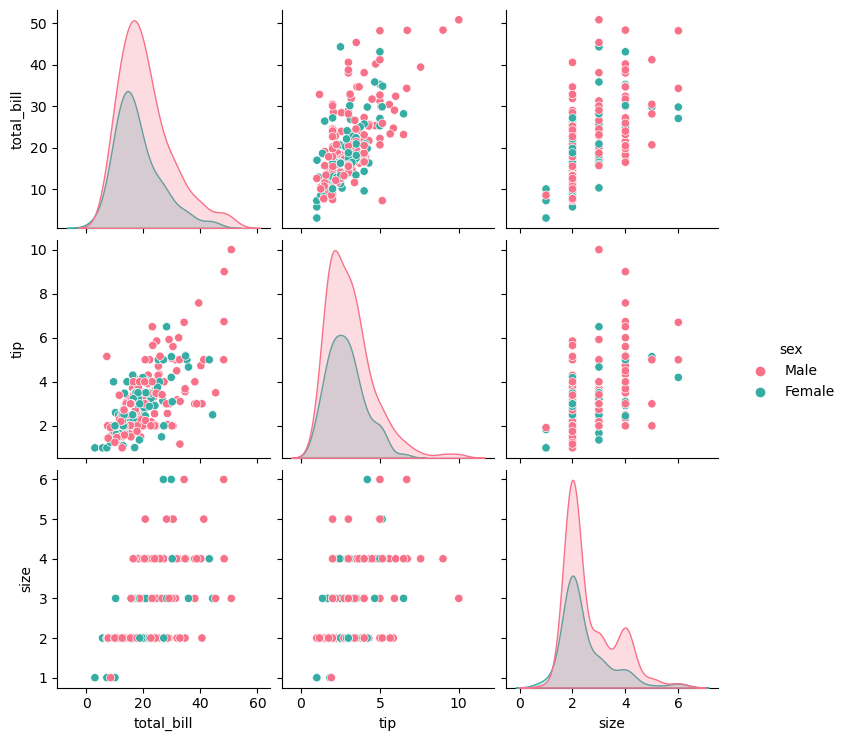

In [123]:
sns.pairplot(data=tips,hue='sex',palette='husl')
plt.show()

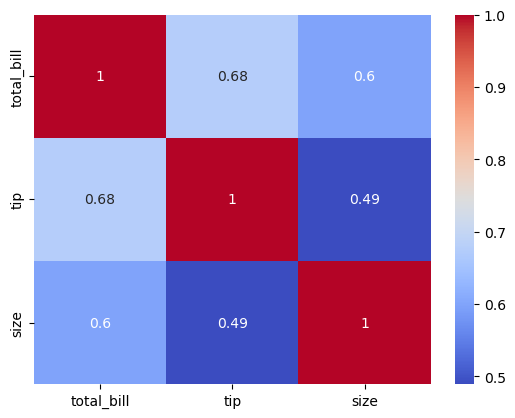

In [129]:
numeric_cols = tips.select_dtypes(include=['number'])
co_matrix = numeric_cols.corr()
sns.heatmap(co_matrix,annot=True,cmap='coolwarm')
plt.show()

In [131]:
a=pd.read_csv('gender_submission.csv')
a

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [133]:
t=pd.read_csv('train.csv')
t

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


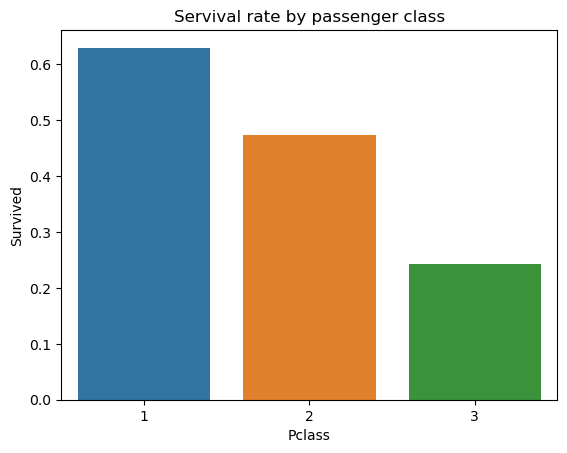

In [136]:
sns.barplot(data=t,x='Pclass',y='Survived',errorbar=None)
plt.title('Servival rate by passenger class')
plt.show()

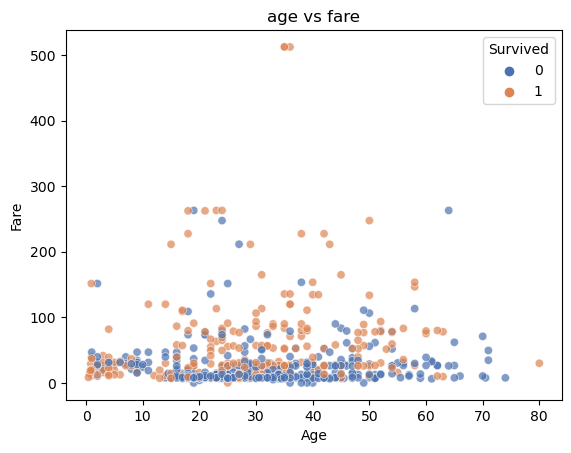

In [148]:
sns.scatterplot(data=t,x='Age',y='Fare',hue='Survived',palette='deep',alpha=0.7)
plt.title('age vs fare')
plt.show()

C:\Users\CVR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


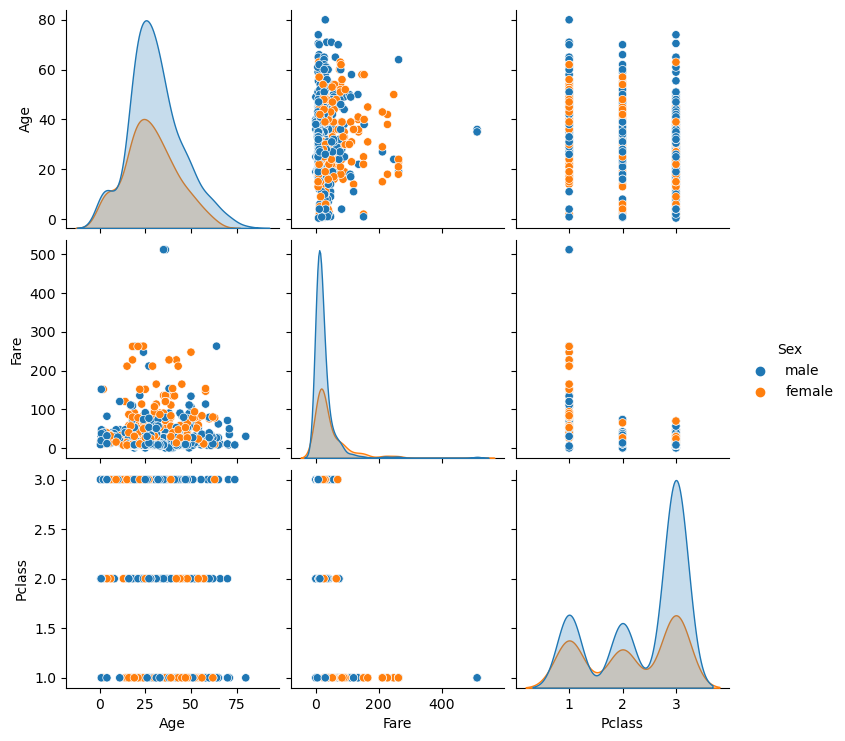

In [163]:
train = t[['Age', 'Fare', 'Pclass', 'Sex']]

sns.pairplot(data=train, hue='Sex')
plt.show()


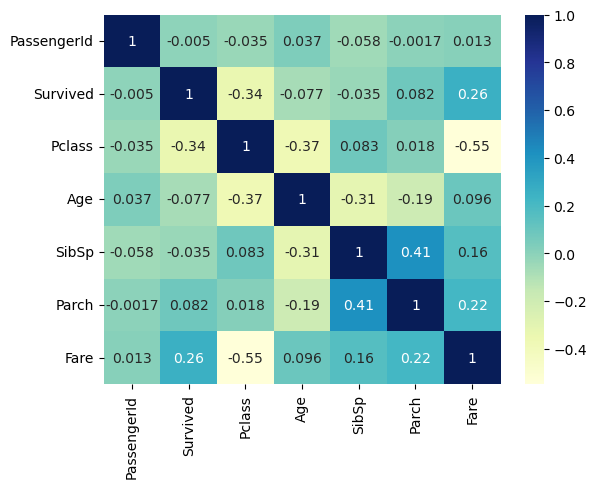

In [177]:
numeric_cols = t.select_dtypes(include=['number'])
co_matrix = numeric_cols.corr()
sns.heatmap(co_matrix,annot=True,cmap='YlGnBu')
plt.show()